# lab1 Stable Match 拓展算法
## ACM1601 朱博抡
### 1.问题描述
• 已知有若干医院和一定数量的学生，每个医院或学生 均对对方有一个偏好排序，请扩展Gale–Shapley算法 使之支持:
1. 某些医院可接收多名学生
2. 医院数量与学生数量不等

### 2.算法描述

程序进行时的中间状态用一个表存储起来

### 3.算法实现

In [1]:
def StableMatch(hospital,student):
    "Stable Match Algorithm"
    len_stu = len(student)
    len_hospital = len(hospital)
    stu_pri=[[0]*len_stu]*len_hospital
    # 第i个医院中学生j的优先级=stu_pri[i][j]
    for j in range(len_hospital):
        #j = hos
        #k = pri
        for k in range(len(hospital[j][1])):
            stu_pri[j][hospital[j][1][k]] =k

    hos_pri= [[0]*len_hospital]*len_stu
    # 第i个学生中医院j的优先级=hos_pri[i][j]
    for i in range(len_stu):
        # i = stu
        for j in range(len(student[i])):
            hos_pri[i][student[i][j]]= j
    
    
    stu_now=[ -1 for a in range(len_stu)]#学生目前的对象
    hos_now = [[] for a in range(len_hospital)] #学校目前的学生
    stu_choose = [0]*len_stu     #学生目前的指针
    stu_single = [a for a in range(len_stu)] #队列中的学生
    while len(stu_single) >0 :
        i = stu_single.pop()
        #如果这个学生最喜欢的没拒绝过自己的 单身或者没他好
        this_hos = student[i][stu_choose[i]]
#         print('现在轮到学生',i,'选择自己的医院了','它下个目标是',this_hos,'号医院\n')
        if this_hos == len_hospital :
#             print('这个医院是不存在的 所以该学生应该已经完成了所有\n')
            continue
        max=hospital[this_hos][0]
        hos_love=hospital[this_hos][1]
        if max > len(hos_now[this_hos]) :
#             print('医院',this_hos,'还没有满 把学生',i,'加入该医院中\n')
            hos_now[this_hos].append(i)#把这个学生加入到医院候选中
            stu_now[i] = this_hos #学生目前的对象设置为当前学校
            stu_choose[i] = stu_choose[i] + 1
        else :
#             print('医院',this_hos,'已经满了')
            for j in range(len(hos_now[this_hos])) :
                if stu_pri[this_hos][hos_now[this_hos][j]] > stu_pri[this_hos][i] :
                    #如果选中的这个医院中的第j个学生没有i厉害
#                     print('学生',i,'比学生',hos_now[this_hos][j],'更加优先 具体优先表如下 ',stu_pri[this_hos],'\n')
#                     print('因此用学生',i,'替换学生',hos_now[this_hos][j])
                    stu_single.append(hos_now[this_hos][j]) #j单身
                    hos_now[this_hos][j]=i#j换成i
                    stu_now[i] = this_hos #学生目前的对象设置为当前学校
                    stu_choose[i] = stu_choose[i] + 1
                    break
    return [stu_now,hos_now]

In [2]:
import random
import time
num_hospital = 10
num_factor = 2
num_stu = num_hospital * num_factor
#student = [stu1,stu2,stu3]
# stu1 = love_list
stu_seq = list(range(num_hospital))
hos_seq = [ i for i in range(num_stu)]
student = [[] for i in range(num_stu) ]
hospital = [[2,[]] for i in range(num_hospital)]
for i in range(num_stu):
    student[i]=random.sample(stu_seq,num_hospital)
for i in range(num_hospital):
    hospital[i][1]=random.sample(hos_seq,num_stu)
# hospital = [ [2, random.shuffle(hos_seq) ]   for i in range(num_hospital)]
# hospital = [hos1,hos2,hos3]
# hos1= [max,love_list]

In [3]:
 student

[[7, 3, 2, 4, 6, 8, 9, 5, 1, 0],
 [7, 9, 5, 8, 6, 3, 2, 4, 1, 0],
 [1, 9, 3, 0, 2, 4, 5, 7, 8, 6],
 [0, 2, 3, 1, 8, 9, 6, 5, 7, 4],
 [0, 2, 8, 5, 1, 3, 9, 7, 6, 4],
 [7, 9, 5, 8, 4, 3, 0, 1, 6, 2],
 [3, 5, 4, 0, 7, 2, 8, 1, 9, 6],
 [0, 2, 4, 8, 3, 9, 6, 5, 1, 7],
 [9, 6, 2, 1, 8, 7, 4, 0, 3, 5],
 [2, 1, 9, 0, 4, 3, 7, 8, 6, 5],
 [9, 5, 7, 2, 0, 4, 1, 6, 8, 3],
 [4, 3, 5, 2, 9, 0, 1, 7, 6, 8],
 [7, 5, 0, 1, 4, 3, 6, 2, 8, 9],
 [9, 4, 7, 6, 1, 0, 5, 8, 3, 2],
 [4, 8, 6, 3, 1, 5, 0, 2, 7, 9],
 [9, 3, 2, 5, 6, 0, 8, 4, 7, 1],
 [8, 0, 1, 5, 7, 2, 4, 9, 6, 3],
 [3, 9, 5, 0, 4, 2, 1, 8, 7, 6],
 [8, 9, 6, 3, 2, 1, 5, 4, 7, 0],
 [5, 6, 3, 7, 4, 2, 8, 0, 9, 1]]

In [4]:
 hospital

[[2, [5, 0, 4, 18, 12, 9, 6, 8, 3, 14, 2, 15, 16, 13, 7, 1, 10, 19, 11, 17]],
 [2, [1, 16, 0, 4, 5, 19, 12, 7, 13, 17, 3, 6, 9, 8, 11, 10, 14, 2, 15, 18]],
 [2, [6, 13, 18, 8, 4, 12, 1, 3, 19, 16, 11, 9, 10, 14, 7, 17, 5, 0, 15, 2]],
 [2, [7, 11, 1, 5, 8, 2, 17, 9, 14, 6, 4, 15, 3, 13, 0, 12, 16, 10, 18, 19]],
 [2, [16, 11, 3, 6, 14, 7, 15, 9, 5, 12, 1, 10, 19, 8, 17, 4, 18, 2, 13, 0]],
 [2, [2, 3, 12, 17, 6, 5, 0, 8, 11, 1, 15, 7, 19, 18, 4, 13, 14, 16, 10, 9]],
 [2, [9, 16, 10, 6, 12, 18, 17, 13, 8, 15, 2, 7, 11, 4, 19, 1, 0, 14, 5, 3]],
 [2, [5, 9, 6, 19, 3, 8, 1, 18, 15, 7, 12, 16, 17, 2, 4, 11, 14, 13, 10, 0]],
 [2, [16, 11, 6, 0, 1, 14, 15, 17, 2, 5, 10, 3, 18, 4, 19, 13, 12, 9, 8, 7]],
 [2, [12, 6, 17, 0, 1, 15, 5, 9, 16, 4, 10, 8, 2, 14, 11, 18, 3, 7, 13, 19]]]

In [5]:
import time
start = time.time()
StableMatch(hospital,student)
end = time.time()
# print('Running time: {} Seconds'.format(end-start))
end-start

0.0003650188446044922

### 4.算法分析

10000 268s
1000  2.0s
100  0.02s
10   0.0007s

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(10,1000,34,dtype = int)
y = np.linspace(10,1000,34,dtype = float)
y_times = 10
for j in range(np.size(x)) :
    y_iter = np.zeros(y_times,dtype=float)
    num_hospital = x[j]
    num_factor = 2
    num_stu = num_hospital * num_factor
    #student = [stu1,stu2,stu3]
    # stu1 = love_list
    stu_seq = list(range(num_hospital))
    hos_seq = [ i for i in range(num_stu)]
    student = [[] for i in range(num_stu) ]
    hospital = [[2,[]] for i in range(num_hospital)]
    for yy in range(y_times):
        for i in range(num_stu):
            student[i]=random.sample(stu_seq,num_hospital)
        for i in range(num_hospital):
            hospital[i][1]=random.sample(hos_seq,num_stu)
        start = time.time()
        StableMatch(hospital,student)
        end = time.time()
        y_iter[yy]=end-start
    y[j]=y_iter.mean()  
    

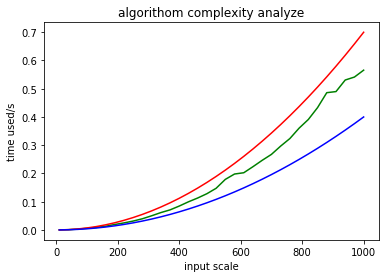

In [19]:
plt.plot(x,y,'g',x,0.0000007*x*x,'r',x,0.0000004*x*x,'b')
plt.xlabel('input scale')
plt.ylabel('time used/s')
plt.title('algorithom complexity analyze')
plt.show()